In [16]:
#import libs
import pandas as pd
import matplotlib
from statsmodels.tsa.arima.model import ARIMA, ARIMAResults
matplotlib.use('nbagg')
import matplotlib.pyplot as plt
%matplotlib inline

ts = pd.read_csv('/home/alessio/Scaricati/cpu_utilizzata.csv', header=0, parse_dates=[0], index_col=0)
tsr = ts.resample(rule='30S').mean()
tsr

,avg(system_cpu_usage)*100
Time,
2022-01-19 20:20:00,4.86
2022-01-19 20:20:30,5.14
2022-01-19 20:21:00,5.25
2022-01-19 20:21:30,5.32
2022-01-19 20:22:00,5.51
...,...
2022-01-20 02:18:00,11.50
2022-01-20 02:18:30,11.10
2022-01-20 02:19:00,9.82


Time
2022-01-19 20:57:30    5.726467
2022-01-19 20:58:00    5.733100
2022-01-19 20:58:30    5.737300
2022-01-19 20:59:00    5.744367
2022-01-19 20:59:30    5.751000
                         ...   
2022-01-20 01:40:30    8.602433
2022-01-20 01:41:00    8.619733
2022-01-20 01:41:30    8.640800
2022-01-20 01:42:00    8.662133
2022-01-20 01:42:30    8.679200
Freq: 30S, Name: trend, Length: 571, dtype: float64

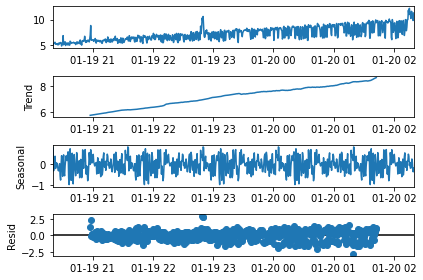

In [17]:
#Work on TREND
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(tsr, model='add', period=150)
result
data = result.trend.dropna()
result.plot()
data


In [18]:
#result.seasonal.plot(figsize=(24,10))

In [19]:
train = tsr.iloc[:514]
test = tsr.iloc[514:]
test

,avg(system_cpu_usage)*100
Time,
2022-01-20 00:37:00,8.88
2022-01-20 00:37:30,8.76
2022-01-20 00:38:00,8.14
2022-01-20 00:38:30,6.59
2022-01-20 00:39:00,6.98
...,...
2022-01-20 02:18:00,11.50
2022-01-20 02:18:30,11.10
2022-01-20 02:19:00,9.82


In [20]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing 
tsmodel=ExponentialSmoothing(train,trend='add',seasonal='add',seasonal_periods=150).fit()

In [21]:
prediction=tsmodel.forecast(40)

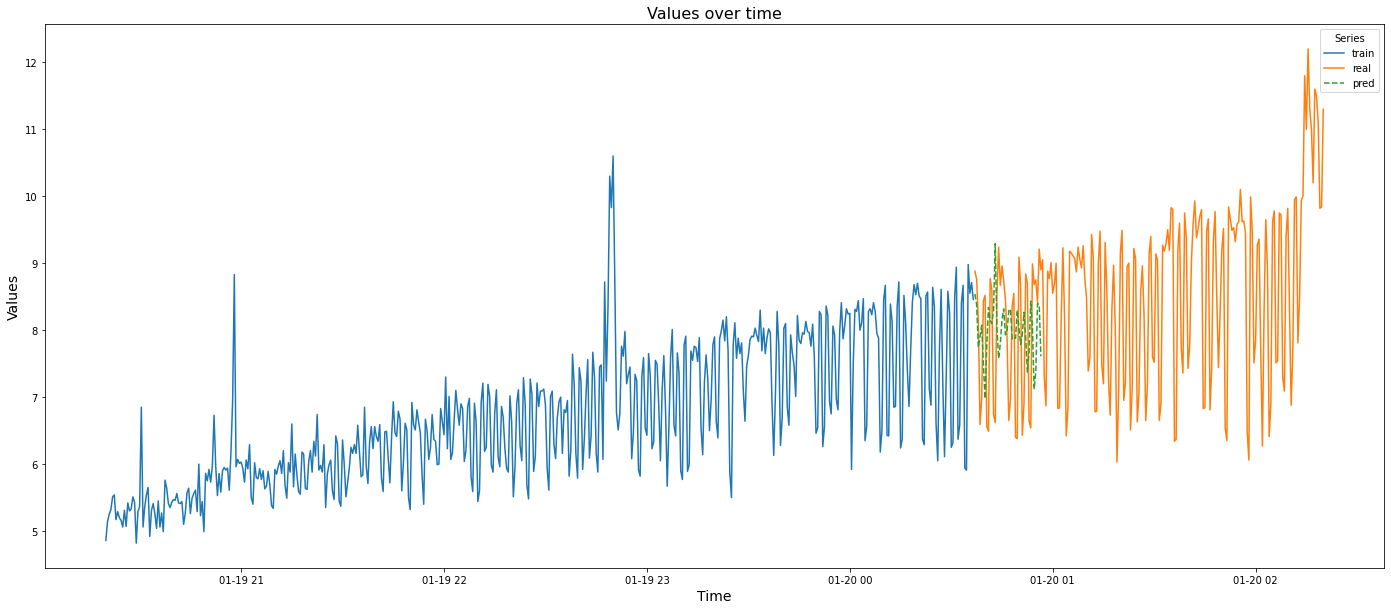

In [22]:
plt.figure(figsize=(24,10))
plt.ylabel('Values',fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.title('Values over time',fontsize=16)
plt.plot(train,"-",label='train')
plt.plot(test,"-",label='real')
plt.plot(prediction,"--",label='pred')
plt.legend(title='Series')